In [2]:
#dataset-bets-nsx-full-rows.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("dataset-bets-nsx-full-rows.csv")

In [4]:
print("📌 Total de registros (linhas):", len(df))
print("👤 Total de usuários únicos:", df["user_id"].nunique())
print("🎰 Total de apostas (bets):", df["bet_id"].nunique())
print("✅ Total de apostas com vitória (WIN):", (df["result"] == "WIN").sum())
print("❌ Total de apostas com derrota (LOSS):", (df["result"] == "LOSS").sum())
print("💰 Valor total apostado:", df["stake_value"].sum())
print("💸 Valor total pago:", df["payout"].sum())

📌 Total de registros (linhas): 18009
👤 Total de usuários únicos: 500
🎰 Total de apostas (bets): 18009
✅ Total de apostas com vitória (WIN): 8004
❌ Total de apostas com derrota (LOSS): 10005
💰 Valor total apostado: 896726.6099999999
💸 Valor total pago: 886746.94


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13268\3729107707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="result", palette="Set2")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13268\3729107707.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="result", palette="Set2")


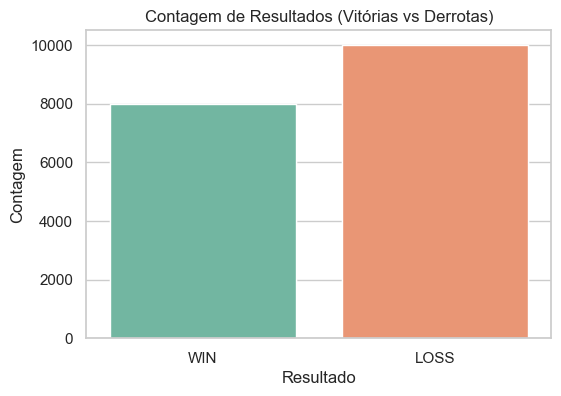

In [5]:
sns.set(style='whitegrid')

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="result", palette="Set2")
sns.countplot(data=df, x="result", palette="Set2")
plt.title("Contagem de Resultados (Vitórias vs Derrotas)")
plt.xlabel("Resultado")
plt.ylabel("Contagem")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13268\2021044713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="category", palette="pastel")


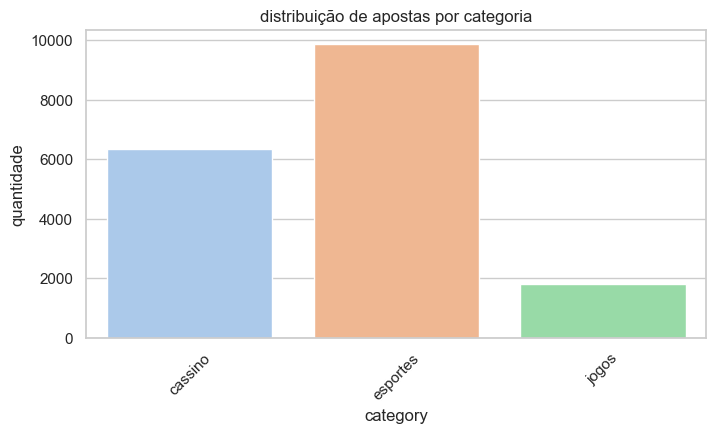

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="category", palette="pastel")
plt.title("distribuição de apostas por categoria")
plt.xlabel("category")
plt.ylabel("quantidade")
plt.xticks(rotation=45)
plt.show()

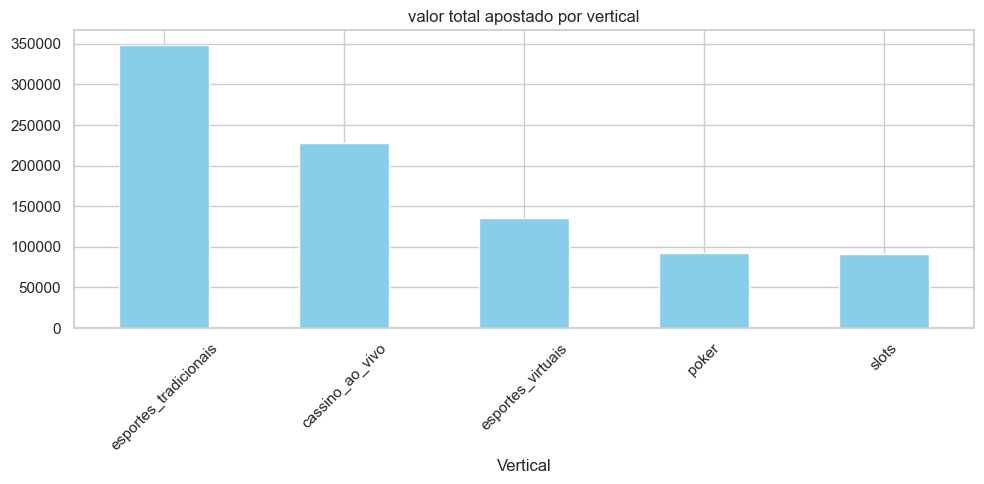

In [8]:
bet_for_vertical = df.groupby("vertical")["stake_value"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
bet_for_vertical.plot(kind="bar", color="skyblue")
plt.title("valor total apostado por vertical")
plt.xlabel("Vertical")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
import plotly.graph_objects as go
import pandas as pd

df["roi"] = (df["payout"] - df["stake_value"]) / df["stake_value"]

segment_metrics = df.groupby("segment").agg(
    total_stake=("stake_value", "sum"),
    total_payout=("payout", "sum"),
    avg_roi=("roi", "mean"),
    num_users=("user_id", "nunique")
).reset_index()

fig = go.Figure(data=[
    go.Bar(name='Stake Total', x=segment_metrics['segment'], y=segment_metrics['total_stake']),
    go.Bar(name='Payout Total', x=segment_metrics['segment'], y=segment_metrics['total_payout'])
])
fig.update_layout(
    title="Visões por Segmento de Usuário: Stake vs Payout",
    xaxis_title="Segmento",
    yaxis_title="Valor Total (R$)",
    barmode='group'
)
fig.show()
